In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt
import cv2


%matplotlib inline

global embed
embed = hub.KerasLayer(os.getcwd())

In [9]:
for x in os.listdir("."):
    print(x)


.ipynb_checkpoints
001.jpg
assets
cosine sim check.ipynb
euclidian distance.ipynb
expected figure.jpg
QUESTION.jpg
resize.ipynb
saved_model.pb
theory ans.txt
variables


In [10]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [11]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

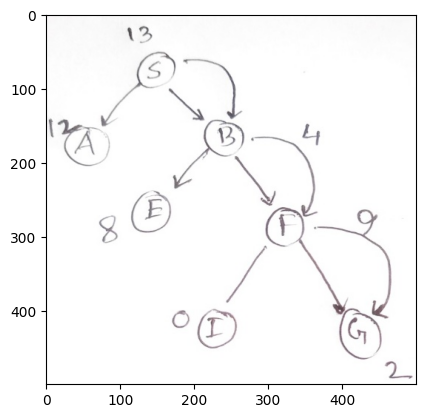

In [12]:
plt.imshow(convertBase64("expected figure.jpg"))

In [13]:

helper = TensorVector("expected figure.jpg")
vector = helper.process()

In [14]:
len(vector)

1280

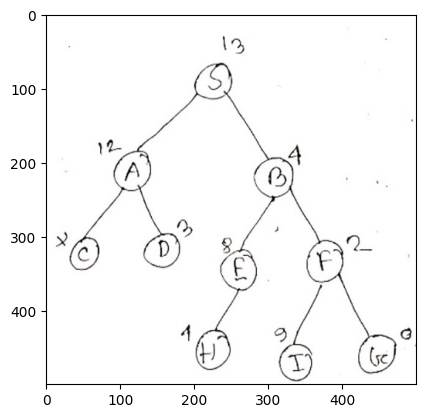

In [15]:
plt.imshow(convertBase64("001.jpg"))

In [16]:
helper = TensorVector("001.jpg")
vector2 = helper.process()


In [17]:
len(vector2)


1280

In [18]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [19]:
cosineSim(vector, vector2)


0.9059597524023174